In [30]:
#Importing packages
import numpy as np
import pandas as pd
%matplotlib inline

#load forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from pmdarima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [31]:
#set seed
import random
random.seed(100)

In [32]:
# define dataset 
series = pd.read_csv(r"C:\Users\IFMRUSER\Desktop\Deep Learning\India_covid19.csv", index_col = 'Date' , parse_dates = True)
#taking the dataset when India crossed 1000 mark 
dfo=series.iloc[67:]
dfo.index.frequency = 'D'
dfo.head()

,Cases,Deaths,Recovered
Date,,,
2020-03-29,1024,27,95
2020-03-30,1251,32,102
2020-03-31,1397,35,123
2020-04-01,1998,58,148
2020-04-02,2543,72,191


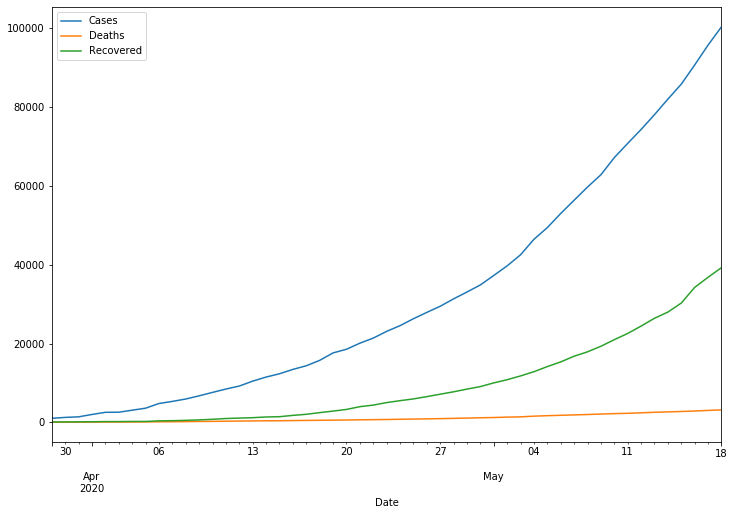

In [33]:
#ploting the data
dfo.columns = ['Cases', 'Deaths', 'Recovered']
dfo.plot(figsize = (12,8))

In [34]:
#applying auto_arima() to find p,d,q
auto_arima(dfo['Cases'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [35]:
#applying auto_arima() to find p,d,q
auto_arima(dfo['Deaths'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [36]:
#applying auto_arima() to find p,d,q
auto_arima(dfo['Recovered'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [37]:
#2nd order difference for Stationarty as derived from auto_arima()
df_transformed = dfo.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,Cases,Deaths,Recovered
Date,,,
2020-03-31,-81.0,-2.0,14.0
2020-04-01,455.0,20.0,4.0
2020-04-02,-56.0,-9.0,18.0
2020-04-03,-521.0,-14.0,-42.0
2020-04-04,491.0,14.0,36.0


In [38]:
#move entire data to test
nobs=0
len(df_transformed)
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]
print(train.shape)
print(test.shape)

(0, 3)
(49, 3)


In [39]:
#applying the VARMA model on test
model = VARMAX(test, order = (2,1), trend = 'c' )
results = model.fit(maxiter = 1000, disp = False)
results.summary()

Dep. Variable:,"['Cases', 'Deaths', 'Recovered']",No. Observations:,49
Model:,"VARMA(2,1)",Log Likelihood,-899.794
,+ intercept,AIC,1871.587
Date:,"Tue, 19 May 2020",BIC,1939.693
Time:,12:17:43,HQIC,1897.426
Sample:,03-31-2020,,
,- 05-18-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"42.11, 18.87, 25.31",Jarque-Bera (JB):,"7.11, 0.40, 145.27"
Prob(Q):,"0.38, 1.00, 0.97",Prob(JB):,"0.03, 0.82, 0.00"
Heteroskedasticity (H):,"2.19, 3.11, 8.56",Skew:,"0.88, -0.02, 1.87"


In [40]:
# storing the forecasted values but this will be in 2nd order dfference
df_forcast = results.forecast(7)
df_forcast

,Cases,Deaths,Recovered
2020-05-19,740.551354,19.211478,886.735014
2020-05-20,-212.321593,-36.339002,-195.609874
2020-05-21,-44.423308,34.385372,-126.108671
2020-05-22,153.646993,17.345251,266.115698
2020-05-23,268.846510,-27.992196,-183.232196
2020-05-24,-88.378149,4.057263,116.852395
2020-05-25,43.609760,11.075021,342.050565


In [41]:
#Inversing the 2nd order difference

# Add the most recent first difference from the training set to the forecast cumulative sum
df_forcast['Cases1d'] = (dfo['Cases'].iloc[-nobs-1]-dfo['Cases'].iloc[-nobs-2]) + df_forcast['Cases'].cumsum()
df_forcast['Deaths1d'] = (dfo['Deaths'].iloc[-nobs-1]-dfo['Deaths'].iloc[-nobs-2]) + df_forcast['Deaths'].cumsum()
df_forcast['Recovered1d'] = (dfo['Recovered'].iloc[-nobs-1]-dfo['Recovered'].iloc[-nobs-2]) + df_forcast['Recovered'].cumsum()


# Now build the forecast values from the first difference set
df_forcast['CasesForecast'] = dfo['Cases'].iloc[-nobs-1] + df_forcast['Cases1d'].cumsum()
df_forcast['DeathsForecast'] = dfo['Deaths'].iloc[-nobs-1] + df_forcast['Deaths1d'].cumsum()
df_forcast['RecoveredForecast'] = dfo['Recovered'].iloc[-nobs-1] + df_forcast['Recovered1d'].cumsum()

In [42]:
#lets now see the forecasted values for next week
df_forcast.iloc[:,6:9]

,CasesForecast,DeathsForecast,RecoveredForecast
2020-05-19,105698.551354,3306.211478,42557.735014
2020-05-20,110856.781116,3420.083955,45686.860155
2020-05-21,115970.587569,3568.341804,48689.876624
2020-05-22,121238.041015,3733.944903,51959.008793
2020-05-23,126774.340971,3871.555807,55044.908764
2020-05-24,132222.262778,4013.223974,58247.661132
2020-05-25,137713.794344,4165.967163,61792.464064
